In [25]:
import gym
import itertools
import matplotlib.style
import matplotlib.pyplot as plt
import numpy as np
import sys
from helper import plot_rewards, plot_iters
from collections import defaultdict, namedtuple
import random
from IPython.display import clear_output
import time
matplotlib.style.use('dark_background')
np.random.seed(23)
random.seed(23)

In [13]:
env = gym.make('Taxi-v3')
print('No. of actions: ', env.nA)
print('No. of states: ', env.nS)
env.render()

No. of actions:  6
No. of states:  500
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [14]:
def greedyEpsilon(Q, eps, num_a):
    def nest(s):
        probA = np.ones(num_a) * eps / num_a
        bestA = np.argmax(Q[s])
        probA[bestA] += (1.0 - eps)
        return probA
    return nest

In [50]:
def qLearning(env, episodes, discount = 0.95, alpha = 0.95, eps = 0.1):

    Q = defaultdict(lambda: np.zeros(env.nA))
    test_r = []
    wut = []
    iters2 = []
    policy = greedyEpsilon(Q, eps, env.nA)
    time_arr = []
    for episode in range(episodes):
        r=0
        s = env.reset()
        env.render()
        print('Episode #: ',episode)
        i2 = 0
        #st = time.time()
        for t in itertools.count():
            probA = policy(s)
            a = np.random.choice(np.arange(len(probA)),p = probA)
            s_prime, reward, done, _ = env.step(a)
            r += reward    
            best_next_a = np.argmax(Q[s_prime])    
            td_target = reward + discount * Q[s_prime][best_next_a]
            td_delta = td_target - Q[s][a]
            Q[s][a] += alpha * td_delta
            i2 += t
            
            if done:
                break
                
            s = s_prime
        #time_arr.append(time.time() - st)
        clear_output(wait=True)
        iters2.append(i2)
        test_r.append(r)
        
    wut = np.cumsum(test_r)/np.arange(1,episodes+1)
    iters3 = np.cumsum(iters2)/np.arange(1,episodes+1)
    return Q, wut, iters3, time_arr

In [16]:
Q, rewards, iters, time = qLearning(env, 10001)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode #:  10000


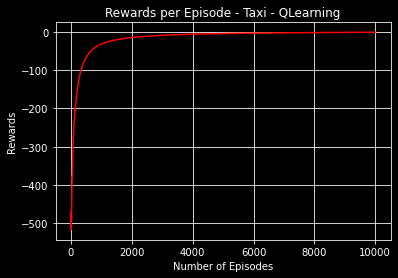

In [17]:
plot_rewards(rewards, 'Rewards per Episode - Taxi - QLearning','Rewards')

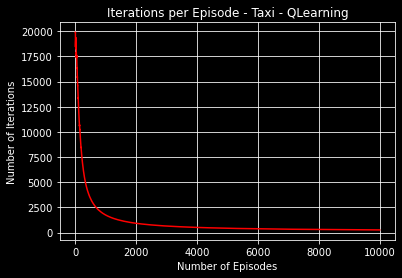

In [18]:
plot_iters(iters, 'Iterations per Episode - Taxi - QLearning', 'Number of Iterations')

In [68]:
Qlist = []
for i in range(len(Q)):
    Qlist.append(Q[i])
opt_pol = []
for p in Qlist:
    opt_pol.append(max(p))
opt_pol = np.around(opt_pol, decimals=3)
#print(opt_pol)
a2w = {0:'v', 1:'^', 2:'>', 3:'<', 4:'P', 5:'D'}
policy_arrows = [a2w[x] for x in np.argmax(Qlist, axis=-1)]
#print(policy_arrows)#.reshape([-1, 483])
combined = np.column_stack((policy_arrows,opt_pol))
print(combined.reshape([10,100]))

[['v' '0.0' 'P' '5.21' 'P' '10.951' 'P' '6.537' 'v' '-3.275' 'v' '0.0'
  'v' '-3.275' '>' '-0.493' 'v' '5.21' 'v' '0.534' 'v' '0.0' 'v' '1.614'
  '>' '-1.468' '>' '0.534' 'v' '-1.468' 'v' '0.0' 'D' '20.0' 'v' '6.537'
  'v' '12.58' 'v' '7.933' 'v' '0.0' '<' '3.949' '<' '9.404' '<' '5.21'
  'v' '-2.395' 'v' '0.0' 'v' '-2.395' 'v' '0.534' 'v' '3.949' 'v'
  '-0.493' 'v' '0.0' '<' '0.534' 'v' '-0.493' 'v' '1.614' 'v' '-0.493'
  'v' '0.0' '<' '18.0' 'v' '7.933' '<' '10.951' 'v' '9.404' 'v' '0.0' 'v'
  '-1.468' 'v' '2.752' 'v' '-0.493' '>' '2.752' 'v' '0.0' '>' '2.752' '>'
  '6.537' 'v' '2.752' 'v' '-1.468']
 ['v' '0.0' 'v' '-0.493' 'v' '0.534' 'v' '2.752' '>' '0.534' 'v' '0.0'
  '>' '6.537' '>' '16.1' 'v' '9.404' 'v' '10.951' 'v' '0.0' 'v' '-2.395'
  'v' '1.614' 'v' '-1.468' '>' '3.949' 'v' '0.0' '>' '3.949' '>' '7.933'
  '<' '1.614' 'v' '-2.395' 'v' '0.0' '<' '-1.468' 'v' '1.614' 'v' '3.949'
  'v' '1.614' 'v' '0.0' 'v' '7.933' '>' '18.0' 'v' '7.933' 'v' '12.58'
  'v' '0.0' '<' '-3.275' '<' 

In [55]:
gammas=[(i+0.5)/10 for i in range(10)]
reward_arr = []
for g in gammas:
    Q, rewards, iters, time = qLearning(env, 10001, discount=g)
    reward_arr.append(max(rewards))


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode #:  10000


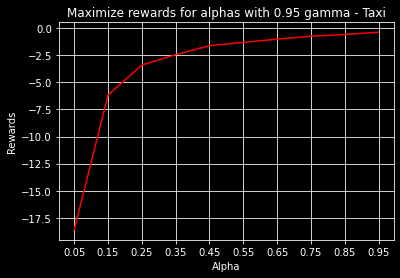

In [36]:
title = 'Maximize rewards for alphas with 0.95 gamma - Taxi'
plt.plot(gammas, reward_arr, color='r')
plt.xticks(gammas)
plt.title(title)
plt.ylabel('Rewards')
plt.xlabel('Alpha')
plt.grid()
plt.savefig('img/'+title+'.png')
plt.show()

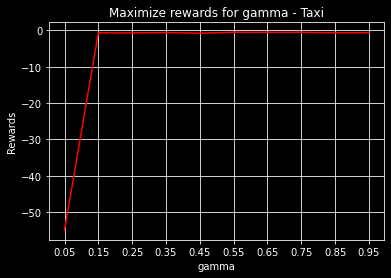

In [56]:
title = 'Maximize rewards for gamma - Taxi'
plt.plot(gammas, reward_arr, color='r')
plt.xticks(gammas)
plt.title(title)
plt.ylabel('Rewards')
plt.xlabel('gamma')
plt.grid()
plt.savefig('img/'+title+'.png')
plt.show()